In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv('ANN.csv')
data.head()

,Al,Cu,Si,Fe,Mn,zn,Ti,Mg,Residuals,UTS,Yield
0,88.25,7.0,2.0,0.60,0.30,0.125,0.125,0.050,0.25,190,130
1,83.40,10.0,4.0,1.25,0.00,1.250,0.000,0.125,0.00,210,170
2,88.65,3.5,6.0,0.50,0.25,0.500,0.125,0.050,0.25,190,110
3,87.80,1.5,8.0,0.50,0.40,0.075,0.125,0.400,0.25,200,120
4,85.40,3.5,9.0,0.50,0.25,0.500,0.125,0.275,0.25,230,130


In [3]:
x= data.drop(columns=['UTS',' Yield'])
y=data[[' Yield']]

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [5]:
#import required packages
from sklearn import metrics
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline


rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = (metrics.mean_absolute_percentage_error(y_test,pred) *100)#calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 19.063162427133015
RMSE value for k=  2 is: 16.148027623211448
RMSE value for k=  3 is: 19.176773698832523
RMSE value for k=  4 is: 20.053831614033818
RMSE value for k=  5 is: 19.46312990798285
RMSE value for k=  6 is: 24.923379261614553
RMSE value for k=  7 is: 27.20066358853123
RMSE value for k=  8 is: 25.70361805655923
RMSE value for k=  9 is: 22.479104271383683
RMSE value for k=  10 is: 23.178847798333095


<AxesSubplot:>

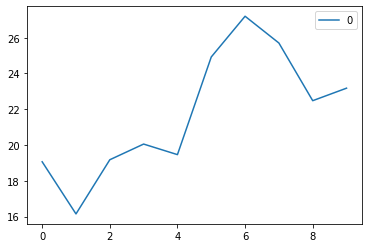

In [6]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [7]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=3)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 2}

In [8]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [9]:
y_pred = model.predict(x)
y_predi = model.predict(x)
print(y_pred)

[[136.66666667]
 [136.66666667]
 [126.66666667]
 [150.        ]
 [146.66666667]
 [ 97.66666667]
 [166.66666667]
 [146.66666667]
 [160.        ]
 [240.        ]
 [ 66.        ]
 [102.        ]
 [122.        ]
 [ 87.66666667]
 [216.66666667]
 [216.66666667]
 [ 82.66666667]
 [166.66666667]
 [150.        ]
 [146.66666667]
 [153.33333333]
 [ 66.        ]
 [123.33333333]
 [123.33333333]
 [146.66666667]
 [160.        ]
 [233.33333333]
 [140.        ]
 [102.        ]
 [102.        ]
 [153.33333333]
 [153.33333333]
 [200.        ]
 [116.        ]
 [216.66666667]
 [146.66666667]
 [233.33333333]
 [233.33333333]
 [153.33333333]]


In [10]:
print(y)

     Yield
0      130
1      170
2      110
3      120
4      130
5      100
6      170
7      160
8      170
9      270
10      65
11      83
12     120
13     148
14     180
15     250
16      83
17     170
18     170
19     130
20     120
21      50
22     110
23     110
24     160
25     150
26     240
27     140
28      83
29      74
30     190
31     140
32     200
33     170
34     220
35     160
36     210
37     250
38     130


In [11]:
from sklearn import metrics

print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y, y_pred))



Mean Absolute Percentage Error: 0.12911074106363482


In [12]:
import pickle
saved_model_svm = open('KNN_Yield', 'wb')
pickle.dump(knn, saved_model_svm)  
